# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : Shahin 🖊  
* **Last Name** : Shahnavaz 📝  
* **SID** : 810800013 🆔

In [14]:
#Just providing some librarys and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [15]:
# Code Here
df = pd.read_csv("hotels_in_europe.csv")
df.head()

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris","IRR 7,951,542",7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1 night,1 adult,NaN
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris","IRR 1,397,677",8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1 night,1 adult,NaN
2,Timhotel Montmartre,"18th arr., Paris","IRR 7,569,083",8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1 night,1 adult,NaN
3,Hôtel Galileo Champs Elysées,"8th arr., Paris","IRR 6,447,737",8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1 night,1 adult,NaN
4,Hôtel Le Daum,"12th arr., Paris","IRR 7,913,496",8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1 night,1 adult,NaN


In [16]:
def convert_to_numeric(df, column_name):
    if df[column_name].dtype == 'object':
        df[column_name] = df[column_name].str.replace('[^\d.]', '', regex=True)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

columns_to_convert = ['price', 'rating', 'review', 'size', 'distance_from_center', 'nights', 'adults']

for column in columns_to_convert:
    df = convert_to_numeric(df, column)

df.head()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shahin Shahnavaz\AppData\Local\Temp\ipykernel_17108\2270115402.py:3: SyntaxWarning: invalid escape sequence '\d'
  df[column_name] = df[column_name].str.replace('[^\d.]', '', regex=True)


,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris",7951542,7.1,Good,3300.0,1 double bed,20.0,1.9,Suite,1,1,NaN
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris",1397677,8.0,Very good,5921.0,1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1,1,NaN
2,Timhotel Montmartre,"18th arr., Paris",7569083,8.3,Very good,2532.0,1 single bed,NaN,3.4,Comfort Single Room,1,1,NaN
3,Hôtel Galileo Champs Elysées,"8th arr., Paris",6447737,8.6,Fabulous,1457.0,1 large double bed,NaN,4.2,Classic Room,1,1,NaN
4,Hôtel Le Daum,"12th arr., Paris",7913496,8.3,Very good,1273.0,1 double bed,NaN,4.1,Comfort Double Room,1,1,NaN


Number of datas is 7322
10 attributes and their types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   int64  
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   float64
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   float64
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   int64  
 11  adults                7322 non-null   int64  
 12  free_cancellation     583 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 743.8+ KB


statistics description

In [18]:
df.describe()

,price,rating,review,size,distance_from_center,nights,adults
count,7.322000e+03,7129.000000,7169.000000,2454.000000,7322.000000,7322.000000,7322.000000
mean,3.072673e+07,7.742783,3042.230297,59.286471,24.699399,2.667577,3.324638
std,3.897119e+07,1.128965,3956.408832,41.526693,82.440210,1.487226,1.199151
min,6.007210e+05,1.000000,1.000000,10.000000,0.500000,1.000000,1.000000
25%,7.970765e+06,7.300000,214.000000,35.000000,2.200000,1.000000,2.000000
50%,1.963156e+07,8.000000,1668.000000,48.000000,3.700000,3.000000,3.000000
75%,3.872647e+07,8.400000,4233.000000,71.750000,5.800000,4.000000,4.000000
max,6.674405e+08,10.000000,25125.000000,550.000000,500.000000,5.000000,5.000000


Its logical that when the rating, quality, bed, size increase then price is going to be higher.
Another thing we have to check is the relation between distance_from_center and price.
As we see it isnt neccesery related by a directed relation to price.

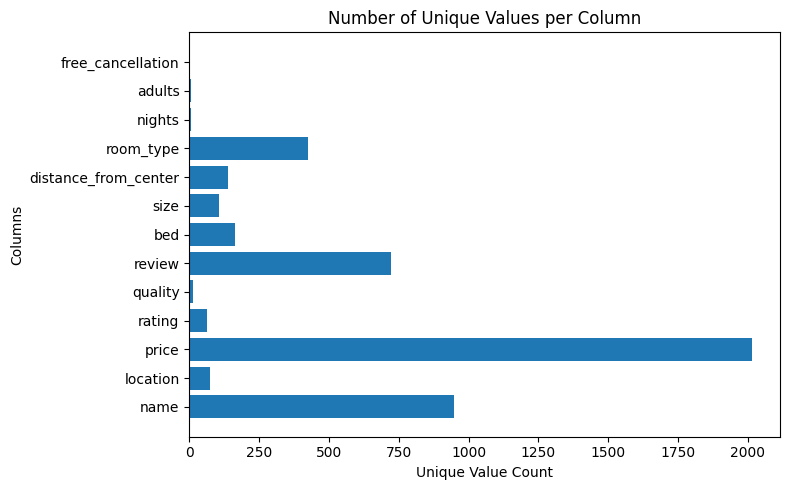

In [19]:
unique_counts = df.nunique()
plt.figure(figsize=(8, 5))
plt.barh(unique_counts.index, unique_counts.values)
plt.title('Number of Unique Values per Column')
plt.xlabel('Unique Value Count')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

This matrix show the 2by 2 dependency value. We can see the most colomn which relates to price are nights and adults.

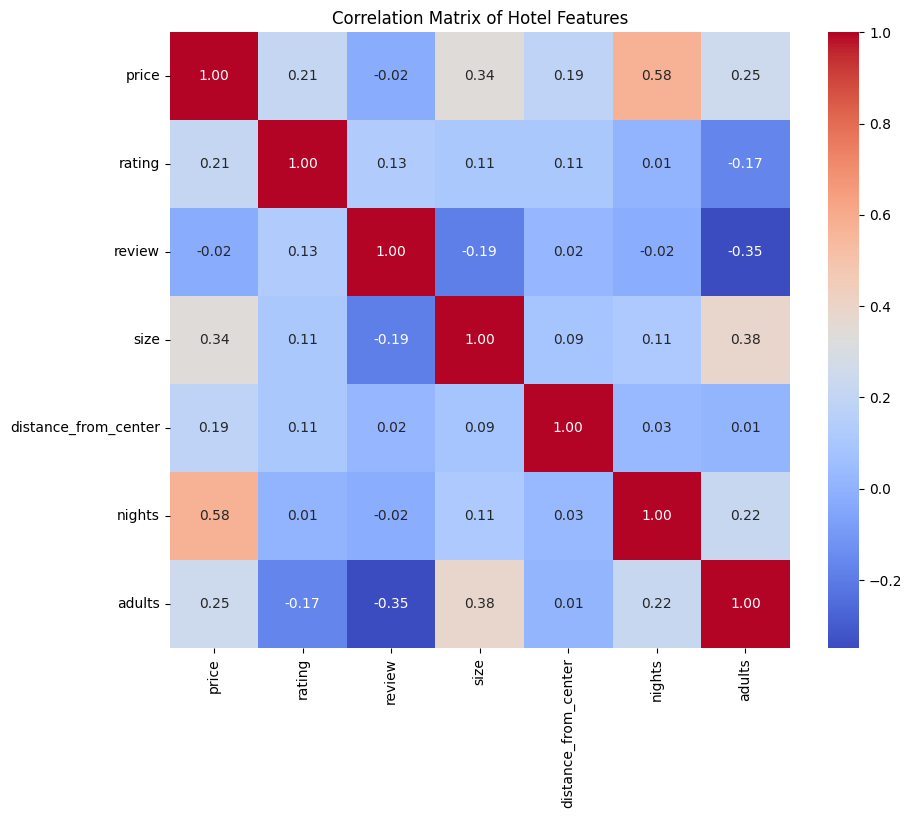

In [20]:

correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Hotel Features')
plt.show()

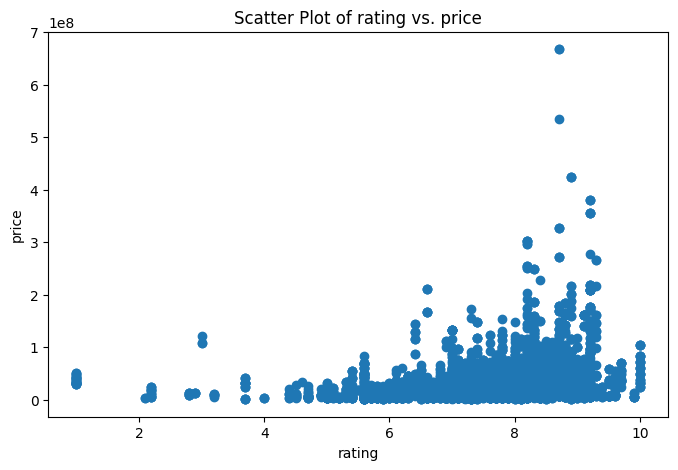

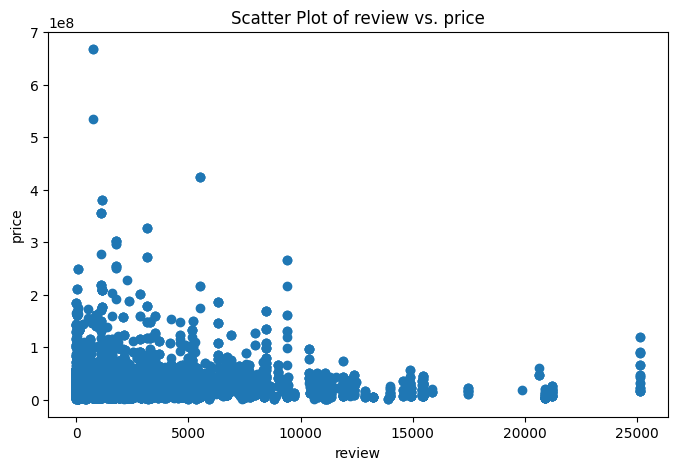

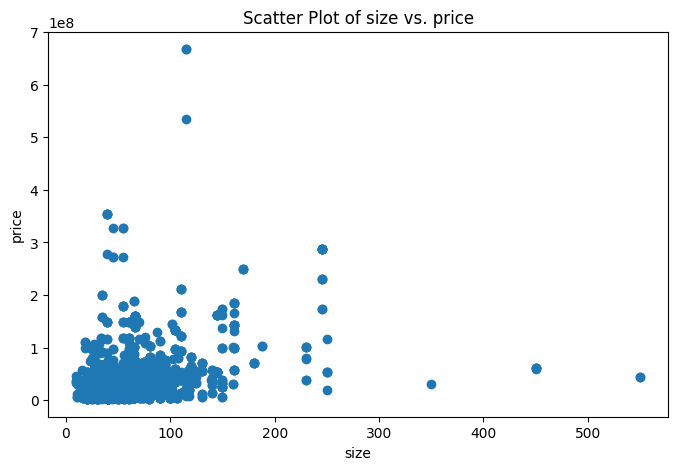

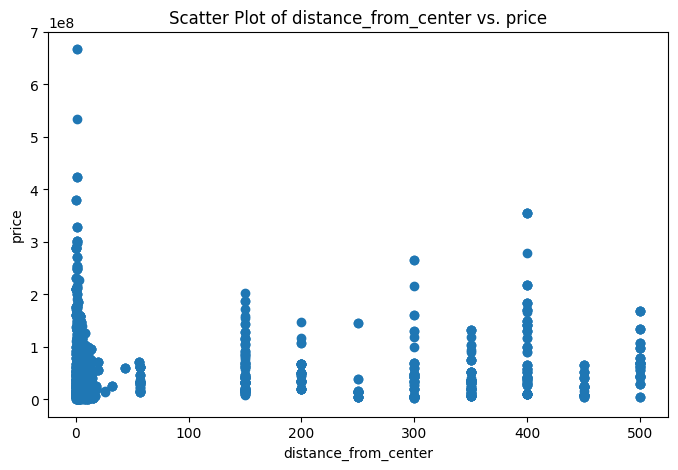

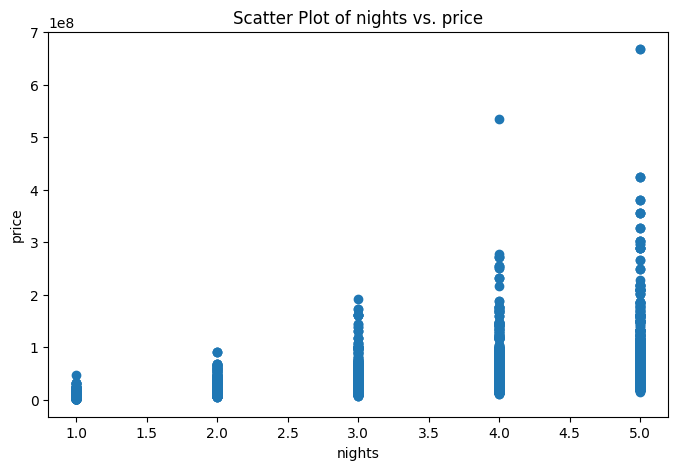

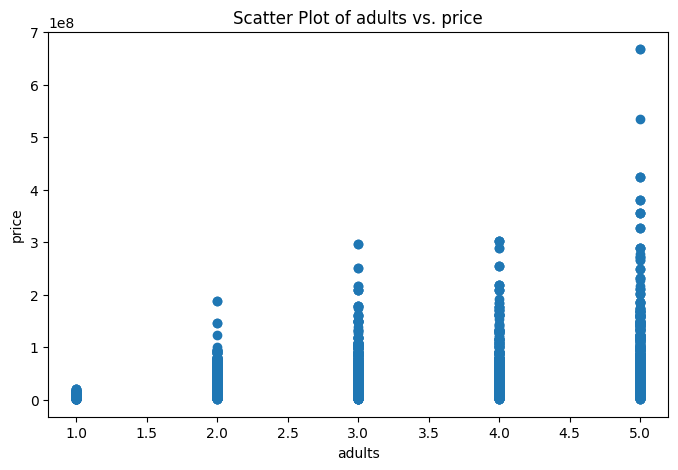

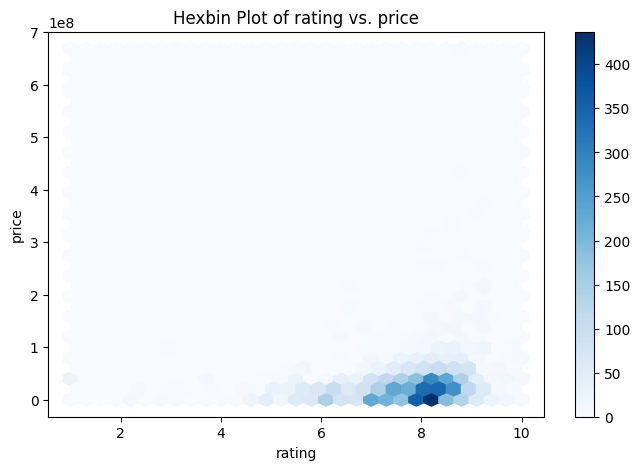

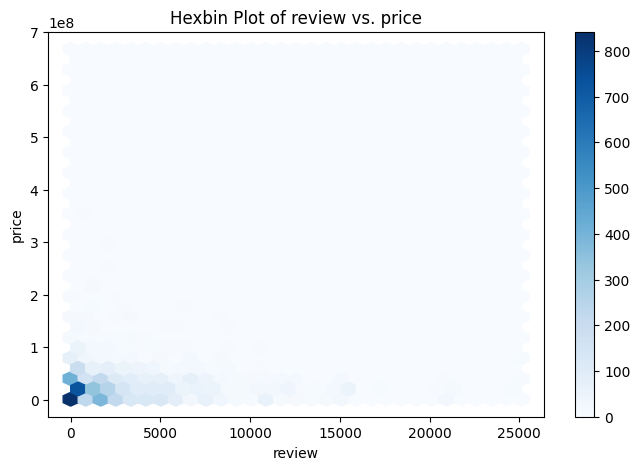

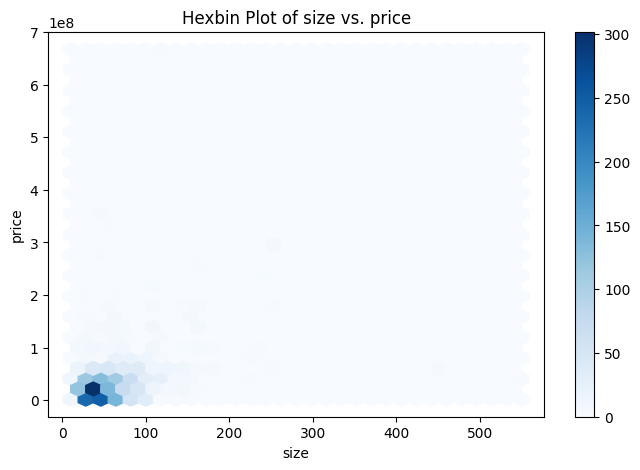

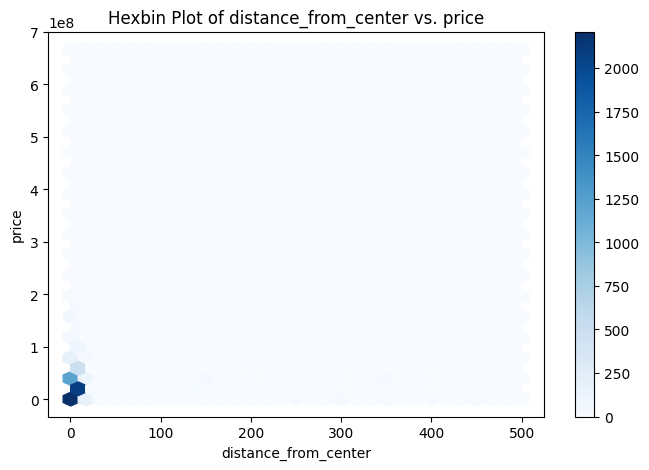

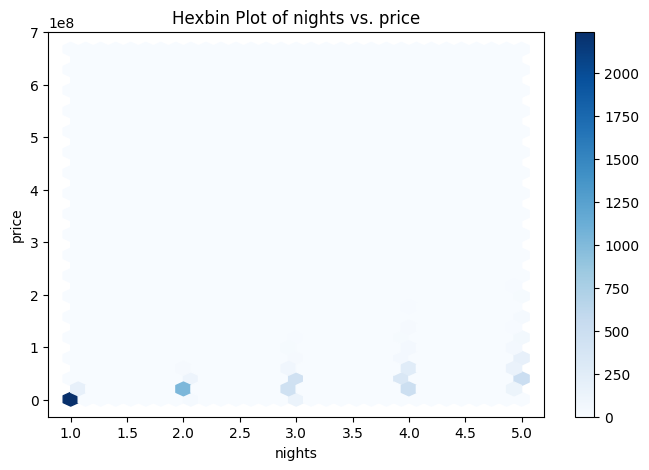

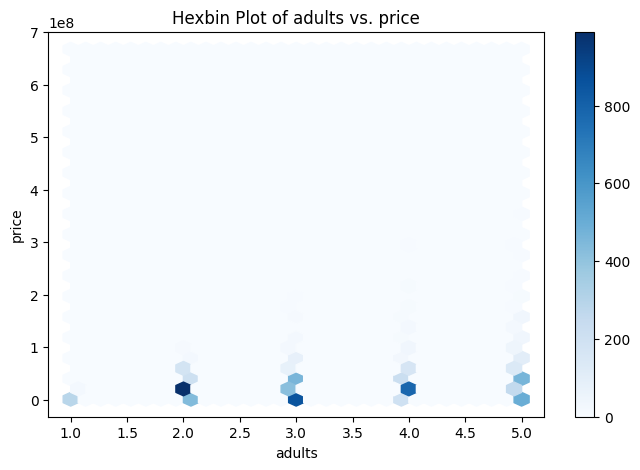

In [21]:

numerical_df = df.select_dtypes(include=['number'])

independent_cols = numerical_df.columns.drop('price')
dependent_col = 'price'

# Create scatter plots
for independent_col in independent_cols:
    plt.figure(figsize=(8, 5))
    plt.scatter(numerical_df[independent_col], numerical_df[dependent_col])
    plt.title(f'Scatter Plot of {independent_col} vs. {dependent_col}')
    plt.xlabel(independent_col)
    plt.ylabel(dependent_col)
    plt.show()

# Create hexbin plots
for independent_col in independent_cols:
    plt.figure(figsize=(8, 5))
    plt.hexbin(numerical_df[independent_col], numerical_df[dependent_col], gridsize=30, cmap='Blues')
    plt.title(f'Hexbin Plot of {independent_col} vs. {dependent_col}')
    plt.xlabel(independent_col)
    plt.ylabel(dependent_col)
    plt.colorbar()
    plt.show()

Name doesn't really help us for extracting relational infos from hotel datas.
Also its true for location and review values as we can see the dependency between these and price is low.

In [22]:
df = df.drop('name', axis=1)
df = df.drop('location', axis=1)
df = df.drop('review', axis=1)
df = df.drop('bed', axis=1)
df = df.drop('room_type', axis=1)
df = df.drop('free_cancellation', axis=1)
df.head()

,price,rating,quality,size,distance_from_center,nights,adults
0,7951542,7.1,Good,20.0,1.9,1,1
1,1397677,8.0,Very good,NaN,4.6,1,1
2,7569083,8.3,Very good,NaN,3.4,1,1
3,6447737,8.6,Fabulous,NaN,4.2,1,1
4,7913496,8.3,Very good,NaN,4.1,1,1


### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

We wanna know the default hotel room price for one night at all.

In [23]:
# Code Here
df['price_per_night'] = df['price'] / df['nights']

### 🧩 Manipulate Columns 🔢  
In this subsection, you should extract numerical values from columns and also convert categorical data to numerical values,as described in the project documentation 📄.

In [24]:
# Code Here
quality_mapping = {
    'Good': 2,
    'Very good': 3,
    'Fabulous': 4,
    'Superb': 5,
    'Review score': np.nan,
    'Exceptional': 6
}

df['quality'] = df['quality'].map(quality_mapping).fillna(np.nan)




for column in df.select_dtypes(include=np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Replace outliers with NaN
    df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), np.nan)






### 🛠 Handling Missing Values 💡
In this subsection, you are supposed to handle null and missing values, following regular techinuques, used in this context

In [25]:
# Code Here
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['size'] = df['size'].fillna(df['size'].mode()[0])
df['distance_from_center'] = df['distance_from_center'].fillna(0)



df.head()


,price,rating,quality,size,distance_from_center,nights,adults,price_per_night
0,7951542.0,7.1,2.0,20.0,1.9,1,1,7951542.0
1,1397677.0,8.0,3.0,45.0,4.6,1,1,1397677.0
2,7569083.0,8.3,3.0,45.0,3.4,1,1,7569083.0
3,6447737.0,8.6,4.0,45.0,4.2,1,1,6447737.0
4,7913496.0,8.3,3.0,45.0,4.1,1,1,7913496.0


### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [26]:
def assign_label(x, column= 'price'):
    """
        x:price(int),
        column:"price"(str),
        returns label of x as explained
    """
    median_price = df[column].median()  # Calculate median price
    if x <= median_price:
        return 0  # Cheap
    else:
        return 1  # Expensive
    pass

df['label'] = df['price'].apply(assign_label)


## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

In [27]:
# Code Here

## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [28]:
# Code Here

X = df.drop('label', axis=1)  # Features (all columns except 'label')
y = df['label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

**Reasons:**

Prevents Feature Dominance: When features have different scales, those with larger values can dominate the learning process, leading to biased models. Normalization ensures that all features contribute equally to the model's training.

Improves Convergence Speed: For gradient-based algorithms, normalization can help the optimization process converge faster, leading to quicker training times.

Enhances Model Performance: By preventing feature dominance and improving convergence, normalization often leads to better overall model performance and accuracy.

In [29]:


# ... (your MinMaxScaler code) ...
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)


### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.



Confussion matrix is the report only for test set...

#### 📉 Gaussian Naive Bayes

As we can see it has some accuracy around 98%

In [30]:
# Code Here

gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_scaled, y_train)

y_pred = gnb_classifier.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       700
           1       0.95      0.98      0.97       765

    accuracy                           0.97      1465
   macro avg       0.97      0.96      0.97      1465
weighted avg       0.97      0.97      0.97      1465

Confusion Matrix:
[[662  38]
 [ 13 752]]


As we can see it has some accuracy around 99 to 100%

#### 🌳 Decision Tree Classifier

Best Hyperparameters: {'ccp_alpha': np.float64(0.0), 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       700
           1       1.00      0.99      1.00       765

    accuracy                           1.00      1465
   macro avg       1.00      1.00      1.00      1465
weighted avg       1.00      1.00      1.00      1465

Confusion Matrix:
[[700   0]
 [  4 761]]


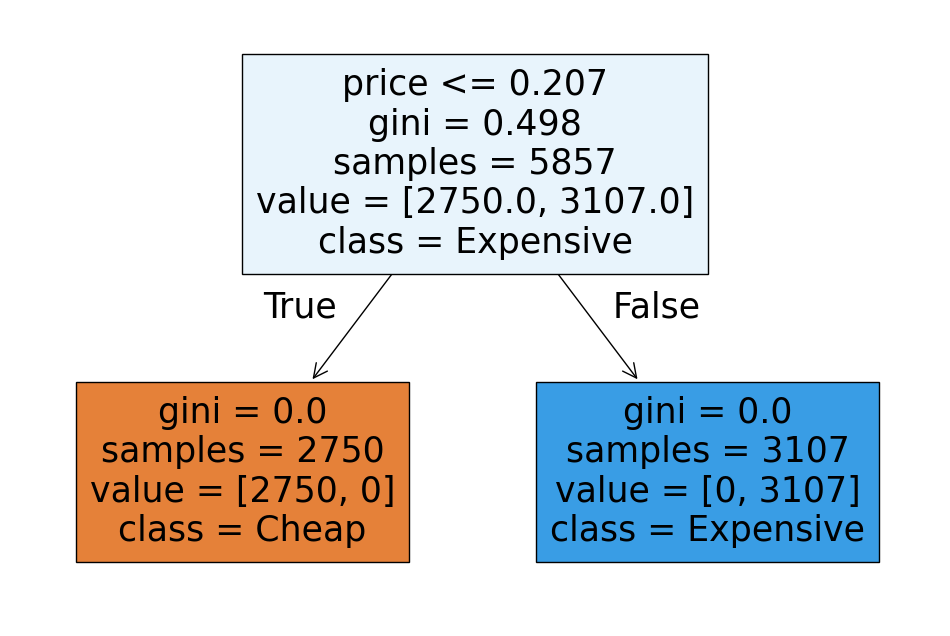

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': np.arange(0.0, 0.1, 0.005)
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
dt_classifier.fit(X_train_scaled, y_train)

y_pred = dt_classifier.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Cheap', 'Expensive'], filled=True)
plt.show()

#### 🌲🌳 Random Forest Classifier

Key Hyperparameters in the Code:

n_estimators: This is the number of decision trees in your forest. More trees generally lead to better performance, but also increase computation time.


max_depth: This limits the depth (number of levels) of each decision tree. Deeper trees can capture more complex relationships, but can also overfit to the training data.


min_samples_split: This is the minimum number of samples required to split an internal node in a decision tree. Higher values can prevent overfitting by avoiding splits on small groups of data points.


min_samples_leaf: This is the minimum number of samples required to be at a leaf node (a terminal node that makes a prediction). Similar to min_samples_split, it helps prevent overfitting.


max_features: This controls the number of features considered when looking for the best split at each node. It can be a number, a percentage, or one of the predefined options ('auto', 'sqrt', 'log2').

In [32]:
# Code Here
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_classifier = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

best_rf_classifier.fit(X_train_scaled, y_train)

y_pred = best_rf_classifier.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       700
           1       1.00      0.99      1.00       765

    accuracy                           1.00      1465
   macro avg       1.00      1.00      1.00      1465
weighted avg       1.00      1.00      1.00      1465

Confusion Matrix:
[[700   0]
 [  4 761]]


#### ⚡️ Adaptive Boosting

Learning Rate: Controlling the Step Size

In AdaBoost, the learning rate is a hyperparameter that controls how much influence each weak learner (typically a decision tree) has on the overall model. It's a value between 0 and 1, and it essentially scales the contribution of each weak learner's predictions.


Impact of n_estimators:

Increasing n_estimators: Generally leads to better performance up to a certain point, as the model has more weak learners to combine. However, increasing it too much can lead to overfitting and increased computation time.
Decreasing n_estimators: Can make the model simpler and faster, but it might not capture the complexity of the data as well, potentially leading to lower accuracy.

In [33]:
# Code Here
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.5, 1.0]
}

ada_classifier = AdaBoostClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_ada_classifier = AdaBoostClassifier(random_state=42, **best_params)

best_ada_classifier.fit(X_train_scaled, y_train)

y_pred = best_ada_classifier.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Explore the impact of n_estimators
n_estimators_values = [10, 20, 50, 100, 200, 500]
for n_estimators in n_estimators_values:
    ada_classifier = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    ada_classifier.fit(X_train_scaled, y_train)
    y_pred = ada_classifier.predict(X_test_scaled)
    print(f"Results for n_estimators = {n_estimators}:")
    print(classification_report(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       700
           1       1.00      0.99      1.00       765

    accuracy                           1.00      1465
   macro avg       1.00      1.00      1.00      1465
weighted avg       1.00      1.00      1.00      1465

Confusion Matrix:
[[700   0]
 [  4 761]]
Results for n_estimators = 10:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       700
           1       1.00      0.99      1.00       765

    accuracy                           1.00      1465
   macro avg       1.00      1.00      1.00      1465
weighted avg       1.00      1.00      1.00      1465

Results for n_estimators = 20:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       700
           1       1.00      0.99      1.00       765

    accuracy  

#### ⚡️ XGBoost

In [36]:

%pip install scikit-learn==1.2.2


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-1.2.2.tar.gz (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "C:\Users\Shahin Shahnavaz\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\Shahin Shahnavaz\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Shahin Shahnavaz\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
                 ^^^^^^^^^^^

In [37]:

param_grid = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

xgb_classifier = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_classifier = xgb.XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train_scaled, y_train)
y_pred = best_xgb_classifier.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

In [38]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.naive_bayes import GaussianNB
import numpy as np
class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.weights = (1/n_samples) * np.ones(n_samples, dtype=float) # initialize weights uniformly
        for _ in range(self.n_estimators):
            learner = GaussianNB() # instanciate model
            learner.fit(X, y, sample_weight=self.weights) # fit to samples, using weights
            pred = learner.predict(X) # predict the batch
            missClassified = pred != y # get index of misclassified samples
            # TODO : compute learner error rate according to SAMME algorithm
            learner_error_rate = np.sum(self.weights[missClassified]) / np.sum(self.weights)
            # TODO : compute learner weight using SAMME algorithm
            learner_weight = np.log((1 - learner_error_rate) / learner_error_rate) + np.log(len(np.unique(y)) - 1)

            # TODO : a classifier with error rate which is worse than random should be dropped
            if learner_error_rate > (1 - (1 / len(np.unique(y)))):
                continue  # Skip this learner if error rate is too high
            # hint : error rate of untrained classifier : 1 - (1 / n_classes)

            # TODO : increase the weights of misclassified samples according to SAMME algorithm
            self.weights[missClassified] *= np.exp(learner_weight)
            self.weights /= np.sum(self.weights) # renormalize weights to make them sum up to 1
            self.learners.append(learner)
            # TODO : store learner weight in self.learner_weights
            self.learner_weights.append(learner_weight)


    def predict(self, X):
        # note that X can contain multiple samples in shape of array, in which, each row corresponds to a query
        predictionsOfLearners = []
        for learner in self.learners:
            predictionsOfLearners.append(learner.predict(X)) # collect predictions from each learner
        # TODO : weighted vote for each sample's prediction across all learners, each learner's weight is stored in self.learner_weights
        weighted_votes = np.zeros((X.shape[0], len(np.unique(y))))
        for i, learner_pred in enumerate(predictionsOfLearners):
            for j, sample_pred in enumerate(learner_pred):
                weighted_votes[j, sample_pred] += self.learner_weights[i]

        # TODO : make final prediction by considering the label which has highest weighted vote
        final_predictions = np.argmax(weighted_votes, axis=1)
        return final_predictions


In [39]:

# ... (Code for SimpleMultiClassBoosting and training data) ...

# Train SimpleMultiClassBoosting
samme_classifier = SimpleMultiClassBoosting(n_estimators=50)  # Adjust n_estimators as needed
samme_classifier.fit(X_train_scaled, y_train)

# Train AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)  # Adjust n_estimators as needed
ada_classifier.fit(X_train_scaled, y_train)

# Predictions and evaluation for SimpleMultiClassBoosting
y_pred_samme = samme_classifier.predict(X_test_scaled)
report_samme = classification_report(y_test, y_pred_samme)
cm_samme = confusion_matrix(y_test, y_pred_samme)

# Predictions and evaluation for AdaBoostClassifier
y_pred_ada = ada_classifier.predict(X_test_scaled)
report_ada = classification_report(y_test, y_pred_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Print results for comparison
print("SimpleMultiClassBoosting:")
print(report_samme)
print("Confusion Matrix:")
print(cm_samme)
print("\nAdaBoostClassifier:")
print(report_ada)
print("Confusion Matrix:")
print(cm_ada)

SimpleMultiClassBoosting:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       700
           1       1.00      0.98      0.99       765

    accuracy                           0.99      1465
   macro avg       0.99      0.99      0.99      1465
weighted avg       0.99      0.99      0.99      1465

Confusion Matrix:
[[700   0]
 [ 12 753]]

AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       700
           1       1.00      0.99      1.00       765

    accuracy                           1.00      1465
   macro avg       1.00      1.00      1.00      1465
weighted avg       1.00      1.00      1.00      1465

Confusion Matrix:
[[700   0]
 [  4 761]]


● Confusion Matrix:

A table that visualizes the performance of a classification model by showing the counts of correct and incorrect predictions for each class. It has four main parts:

True Positive (TP): Number of samples correctly classified as positive.
True Negative (TN): Number of samples correctly classified as negative.
False Positive (FP): Number of samples incorrectly classified as positive (Type I error).
False Negative (FN): Number of samples incorrectly classified as negative (Type II error).
● Accuracy:

The ratio of correctly predicted samples to the total number of samples. It measures how often the model is correct overall.

● Recall (Sensitivity):

The ratio of correctly predicted positive samples to the total number of actual positive samples. It measures how well the model identifies positive samples. Also called True Positive Rate (TPR).

● Precision:

The ratio of correctly predicted positive samples to the total number of predicted positive samples. It measures how many of the predicted positive samples are actually positive. Also called Positive Predictive Value (PPV).

● F1-Score:

The harmonic mean of precision and recall. It provides a balanced measure between precision and recall, especially when dealing with imbalanced datasets.

● Averaging (Macro, Micro, Weighted):

For multi-class classification, different averaging methods can be used to calculate evaluation metrics:

Macro: Calculates metrics for each class independently and then averages them. Treats all classes equally.
Micro: Calculates metrics globally by counting the total true positives, false negatives, and false positives. Sensitive to class imbalance.
Weighted: Calculates metrics for each class and then averages them, weighting each class by its number of samples. Accounts for class imbalance.